In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
%matplotlib inline


In [2]:
# Load the dataset
data = pd.read_csv("kc_house_data.csv")

# Display the first few rows of the dataset
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# Display the statistical summary of the dataset
data.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


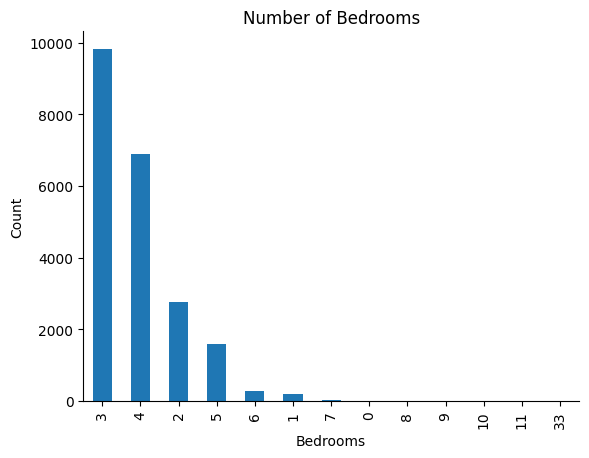

In [4]:
# Plot the number of bedrooms
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine()  # Remove top and right spines
plt.show()


<Figure size 1000x1000 with 0 Axes>

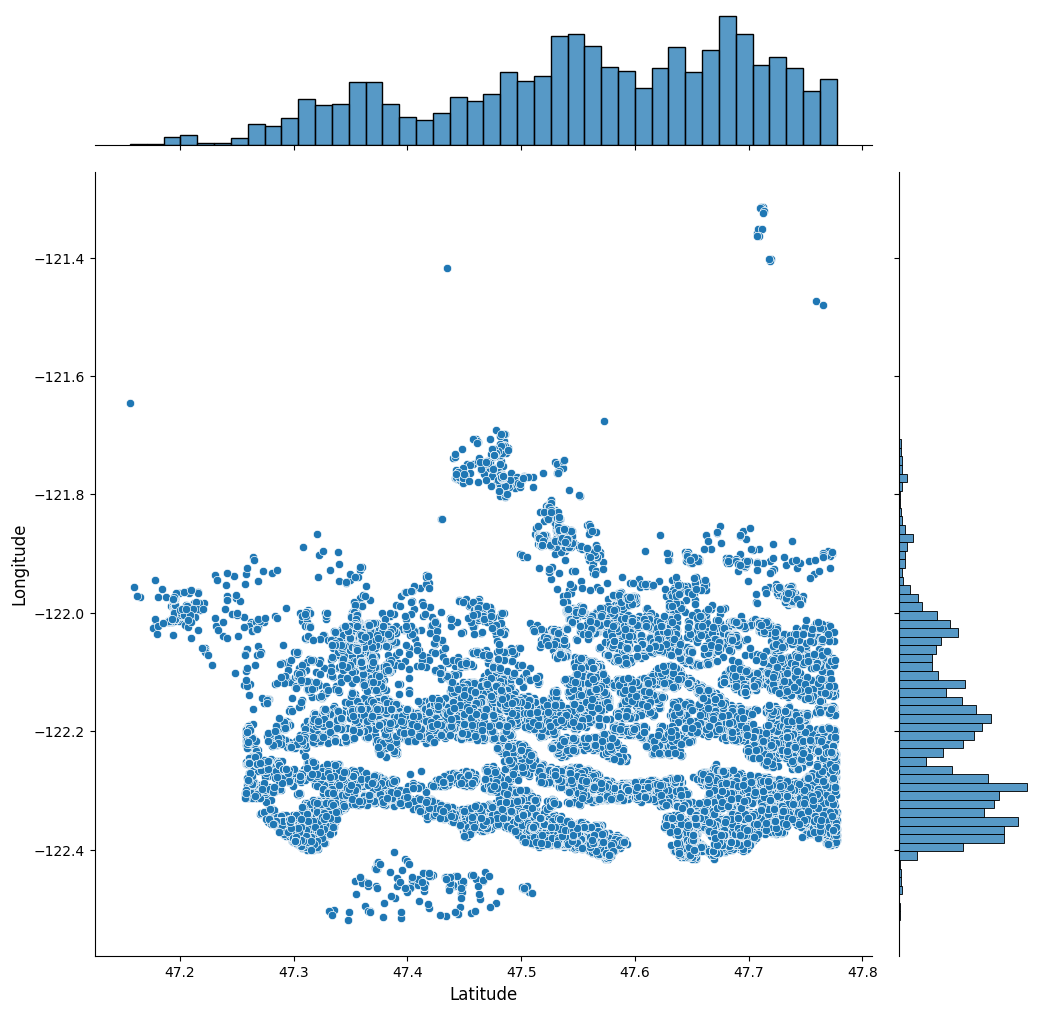

<Figure size 640x480 with 0 Axes>

In [5]:
# Joint plot of latitude and longitude
plt.figure(figsize=(10, 10))
sns.jointplot(x=data.lat.values, y=data.long.values, height=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine()


Text(0, 0.5, 'Square Feet Living')

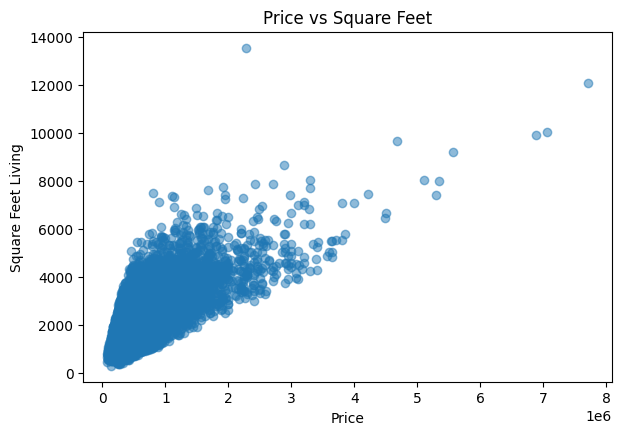

In [6]:
# Scatter plots to explore various relationships
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.scatter(data.price, data.sqft_living, alpha=0.5)
plt.title("Price vs Square Feet")
plt.xlabel("Price")
plt.ylabel("Square Feet Living")



Text(0, 0.5, 'Longitude')

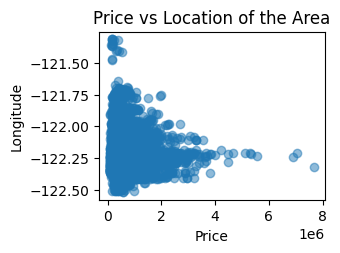

In [7]:
plt.subplot(2, 2, 2)
plt.scatter(data.price, data.long, alpha=0.5)
plt.title("Price vs Location of the Area")
plt.xlabel("Price")
plt.ylabel("Longitude")



Text(0, 0.5, 'Latitude')

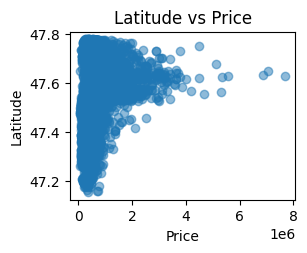

In [8]:
plt.subplot(2, 2, 3)
plt.scatter(data.price, data.lat, alpha=0.5)
plt.title("Latitude vs Price")
plt.xlabel("Price")
plt.ylabel("Latitude")




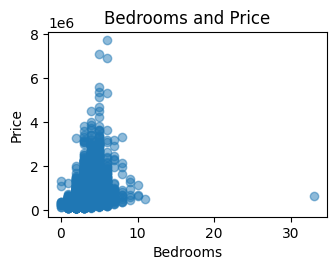

<Figure size 640x480 with 0 Axes>

In [9]:
plt.subplot(2, 2, 4)
plt.scatter(data.bedrooms, data.price, alpha=0.5)
plt.title("Bedrooms and Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")

plt.tight_layout()
plt.show()
sns.despine()

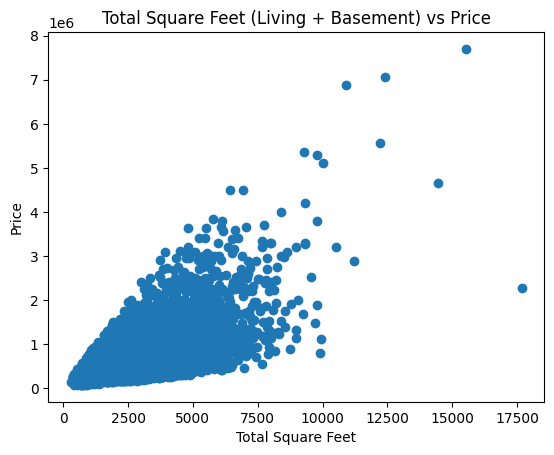

In [10]:
# Scatter plot for total square feet (living + basement) vs price
plt.scatter(data['sqft_living'] + data['sqft_basement'], data['price'])
plt.title("Total Square Feet (Living + Basement) vs Price")
plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.show()



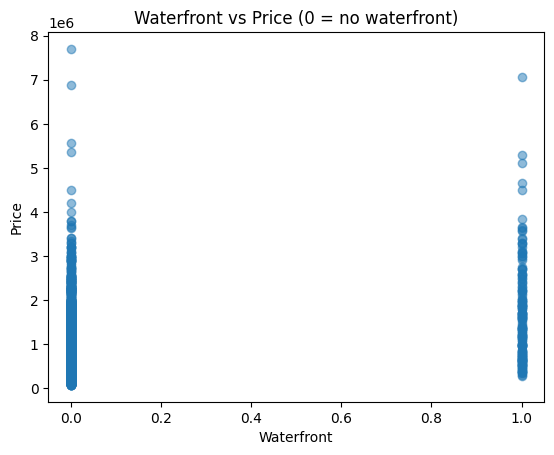

<Figure size 640x480 with 0 Axes>

In [11]:
# Scatter plot for waterfront vs price
plt.scatter(data.waterfront, data.price, alpha=0.5)
plt.title("Waterfront vs Price (0 = no waterfront)")
plt.xlabel("Waterfront")
plt.ylabel("Price")
plt.show()
sns.despine()


In [12]:
# Convert date to binary and prepare training data
data['date'] = [1 if '2014' in values else 0 for values in data.date]
train1 = data.drop(['id', 'price'], axis=1)
labels = data['price']

# Display the first few rows of the training data
train1.head()


,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.2, random_state=42)


In [14]:
# Linear Regression
reg = LinearRegression()
reg.fit(x_train, y_train)
print("Linear Regression Test Score:", reg.score(x_test, y_test))


Linear Regression Test Score: 0.7025610536905509


In [15]:
params = {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.1, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)
clf.fit(x_train, y_train)
print("Gradient Boosting Test Score:", clf.score(x_test, y_test))



Gradient Boosting Test Score: 0.8740494416613067


c:\users\charitha\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Training and Test Scores over Trees')

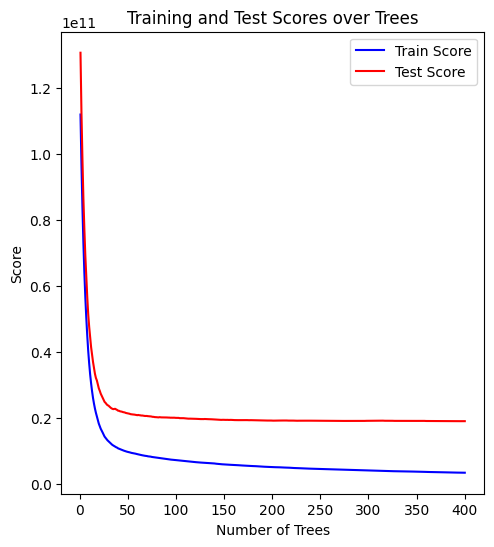

In [16]:
# Training and test score comparison
t_sc = np.zeros(params['n_estimators'], dtype=np.float64)
for i, y_pred in enumerate(clf.staged_predict(x_test)):
    t_sc[i] = clf.loss_(y_test, y_pred)

testsc = np.arange(params['n_estimators']) + 1

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(testsc, clf.train_score_, 'b-', label='Train Score')
plt.plot(testsc, t_sc, 'r-', label='Test Score')
plt.xlabel('Number of Trees')
plt.ylabel('Score')
plt.legend(loc='upper right')
plt.title("Training and Test Scores over Trees")


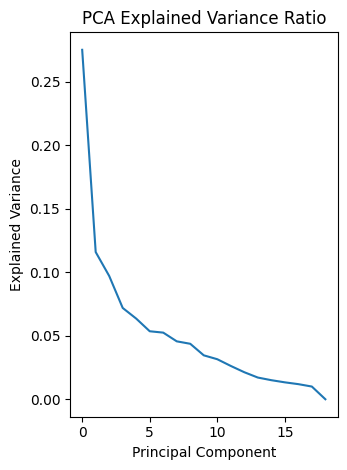

In [17]:
# PCA on training data
pca = PCA()
pca_transformed = pca.fit_transform(scale(train1))
plt.subplot(1, 2, 2)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance Ratio')

plt.tight_layout()
plt.show()
